In [0]:
# instala Insight Toolkit (ITK) y Visualization Toolkit (VTK)
!pip install itk
!pip install itk-texturefeatures

# baja una imagen de prueba
#!wget -O /content/CT_cabeza_2D.png https://drive.google.com/uc?id=0B41zQP7VtCAyTk1CTjRBNnVyT3c

# define algunas funciones utiles
from matplotlib import pyplot as plt
import itk
import numpy as np
from PIL import Image

def showITKImage(image, mode='L', ax=None):
  if ax:
    ax.imshow(Image.fromarray(itk.GetArrayFromImage(image), mode), cmap='gray')
  else:
    plt.imshow(Image.fromarray(itk.GetArrayFromImage(image), mode), cmap='gray')
  
def convertITKImageToPILImage(image, mode='L'):
  Image.fromarray(itk.GetArrayFromImage(image), mode)
  
def convertLabelsToColors(image):
  LabeledImageType = type(image)

  RGBPixelType = itk.RGBPixel[PixelType]
  RGBImageType = itk.Image[RGBPixelType, Dimension]

  ScalarToRGBColormapFilterType = itk.ScalarToRGBColormapImageFilter[LabeledImageType, RGBImageType]
  colormapImageFilter = ScalarToRGBColormapFilterType.New()
  colormapImageFilter.SetColormap(ScalarToRGBColormapFilterType.Jet)
  colormapImageFilter.SetInput(image)
  colormapImageFilter.Update()

  return colormapImageFilter.GetOutput()

     |████████████████████████████████| 4.6MB 2.7MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


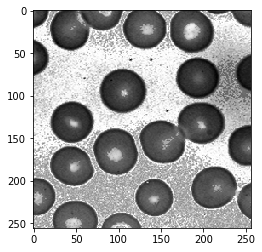

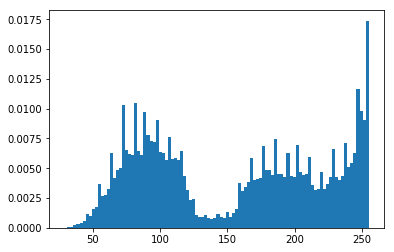

[[253 250 249 248 240 246 245 247 240 248 255 255 252 250 255 245 206 245
  253 232]
 [254 249 246 247 250 255 255 242 245 252 255 255 252 247 251 251 248 255
  207 236]
 [252 240 230 251 251 205 252 246 209 245 209 156 206 255 250 254 255 254
  252 251]
 [250 250 246 238 225 193 247 255 248 250 243 239 250 255 253 246 246 253
  252 249]
 [249 250 251 253 251 200 243 252 254 255 253 249 249 252 255 247 240 250
  250 255]
 [251 246 255 243 178 203 249 250 255 246 245 253 255 249 246 249 246 250
  252 253]
 [249 253 255 235 177 189 250 255 252 251 251 232 206 218 255 255 255 251
  244 247]
 [210 224 240 246 235 230 249 255 217 236 255 238 227 240 252 214 218 248
  240 244]
 [217 220 243 255 255 255 247 250 233 237 242 247 255 255 249 223 209 248
  251 243]
 [240 233 254 255 254 253 251 250 255 246 243 246 243 243 247 255 240 235
  250 248]
 [247 243 254 250 237 227 249 250 249 248 253 250 242 244 244 252 254 238
  246 253]
 [249 241 240 235 223 209 243 246 250 250 250 249 242 241 246 245

In [0]:
image = itk.imread('/content/drive/My Drive/PIBM_2019_2C/Trabajos Prácticos/TP 1 - Segmentación/Imagen 1.png')

PixelType = itk.UC
Dimension = 2

ImageType = itk.Image[PixelType, Dimension]

plt.figure(0)
showITKImage(image)

plt.figure(1)
plt.hist(itk.GetArrayFromImage(image).ravel(), bins=100, density=True)
plt.show()

print(itk.GetArrayFromImage(image)[50:70,80:100])

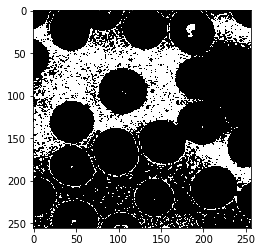

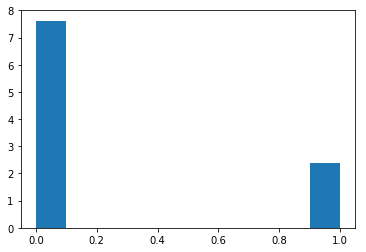

In [0]:


thresholdFilter = itk.BinaryThresholdImageFilter[ImageType, ImageType].New()
thresholdFilter.SetInput(image)

thresholdFilter.SetLowerThreshold(220)
thresholdFilter.SetUpperThreshold(255)
thresholdFilter.SetOutsideValue(0)
thresholdFilter.SetInsideValue(1)

thresholdFilter.Update()

plt.figure(0)
showITKImage(thresholdFilter.GetOutput())

thresholdFilter2 = itk.BinaryThresholdImageFilter[ImageType, ImageType].New()
thresholdFilter2.SetInput(thresholdFilter.GetOutput())
plt.axvline(x=otsufilter)
plt.figure(1)
plt.hist(itk.GetArrayFromImage(thresholdFilter.GetOutput()).ravel(), bins=10, density=True)
plt.show()